In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


In [393]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [394]:
df.shape

(891, 12)

<span style="color:Red;font-size: 22px;font-family: verdana;font-weight: bold ">Note: Total Rows 891 AND Columns:12</span>

In [395]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [396]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<span style="color:Red;font-size: 12px;font-family: verdana;font-weight: bold ">Note: Total Missing Rows in Age Column : 177 & Cabin Column is: 687 and Embarked Column is :2</span>

<span style="color:Red;font-size: 12px;font-family: verdana;font-weight: bold ">Note:  Age Column has int DataType, but Cabin Column and Embarked Column has object Data Type</span>

In [398]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [399]:
df['Age'].isna().value_counts()

False    714
True     177
Name: Age, dtype: int64

<span style="color:Red;font-size: 12px;font-family: verdana;font-weight: bold ">Iterating all columns in DataFrame (having int DataType), to know presence of NaN values and its counts in DataSet</span>

In [400]:
for i in df.columns[:9]:

# Count and print NaN values for each column
        print(f"Column {i}:\n{df[i].isna().value_counts()}\n")

    

Column PassengerId:
False    891
Name: PassengerId, dtype: int64

Column Survived:
False    891
Name: Survived, dtype: int64

Column Pclass:
False    891
Name: Pclass, dtype: int64

Column Name:
False    891
Name: Name, dtype: int64

Column Sex:
False    891
Name: Sex, dtype: int64

Column Age:
False    714
True     177
Name: Age, dtype: int64

Column SibSp:
False    891
Name: SibSp, dtype: int64

Column Parch:
False    891
Name: Parch, dtype: int64

Column Ticket:
False    891
Name: Ticket, dtype: int64




This line of code is using an f-string (formatted string literal) in Python to create a string that includes information about NaN (Not a Number) values in a specific column of a Pandas DataFrame. Let's break down the components:

"Column {i}:": This part of the string is a literal text. {i} is a placeholder for the column name, and it will be replaced with the actual column name when the string is formatted.

\n: This represents a newline character, which is used to move to the next line in the output. It adds a line break after the column name.

{df[i].isna().value_counts()}: This is another f-string expression. It calculates the count of NaN values in the specified column (df[i]) using the isna() method, and then it counts the occurrences of True and False values using value_counts(). The result is a Pandas Series with counts of NaN (True) and non-NaN (False) values.

\n: Another newline character is added to separate the information about different columns.

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">SURVIVAL RATE</span>

In [401]:
survival_rate=df['Survived'].mean()*100

print(f"Overall Survival Rate",survival_rate )

Overall Survival Rate 38.38383838383838


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">SURVIVAL RATE BY GENDER</span>

In [402]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<span style="color:Blue;font-size: 12px;font-family: verdana;font-weight: bold ">Type of Passanger Class or Unique number in Passanger Class Columns </span>

In [403]:
df['Pclass'].nunique()

3

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISULAIZATION: SURVIVAL RATE BY PASSANGER CLASSWISE</span>


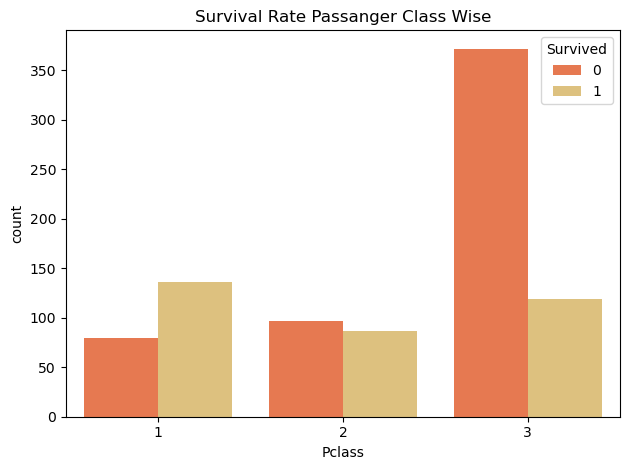

In [404]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate Passanger Class Wise')
plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISULAIZATION: SURVIVAL RATE BY Gender-WISE</span>

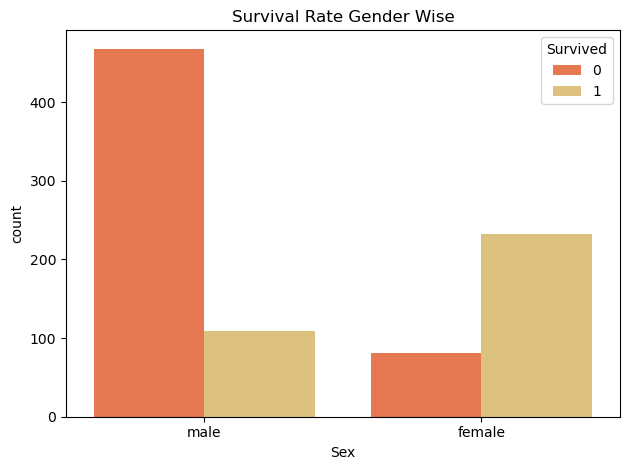

In [405]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Rate Gender Wise')
plt.show()

In [406]:
df['Age'].nunique()

88

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Checking Duplicate Rows</span>

In [407]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [408]:
df.duplicated().sum()

0

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Checking Null Values</span>


In [409]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [410]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [411]:
df.isin([' ','?','null','NA','NaN']).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [412]:
df.isin([' ','?','null','NA','NaN']).sum().any()

False

This line of code is used to check if any element in the DataFrame df matches any of the specified values (' ', '?', 'null', 'NA'). Let me explain each part of the code:

df.isin([' ','?','null','NA']): This part creates a boolean DataFrame of the same shape as df, where each element is True if it matches any of the specified values (' ', '?', 'null', 'NA') and False otherwise.

.sum(): This part calculates the sum of True values along each column. For each column, it counts the number of occurrences of the specified values.

.any(): Finally, this part checks if there is at least one column where the sum of True values is greater than zero. If any column has at least one occurrence of the specified values, the result will be True; otherwise, it will be False.

So, the entire line of code checks if there is any element in the DataFrame df that matches any of the specified values (' ', '?', 'null', 'NA'). If at least one match is found, the result is True; otherwise, it is False. This is useful for identifying the presence of certain values in the DataFrame.

In [413]:
df['Age'].isnull().sum()

177

In [414]:
df.isin(['null']).sum().any()

False

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISULAIZATION: Checking of Missing Value</span>

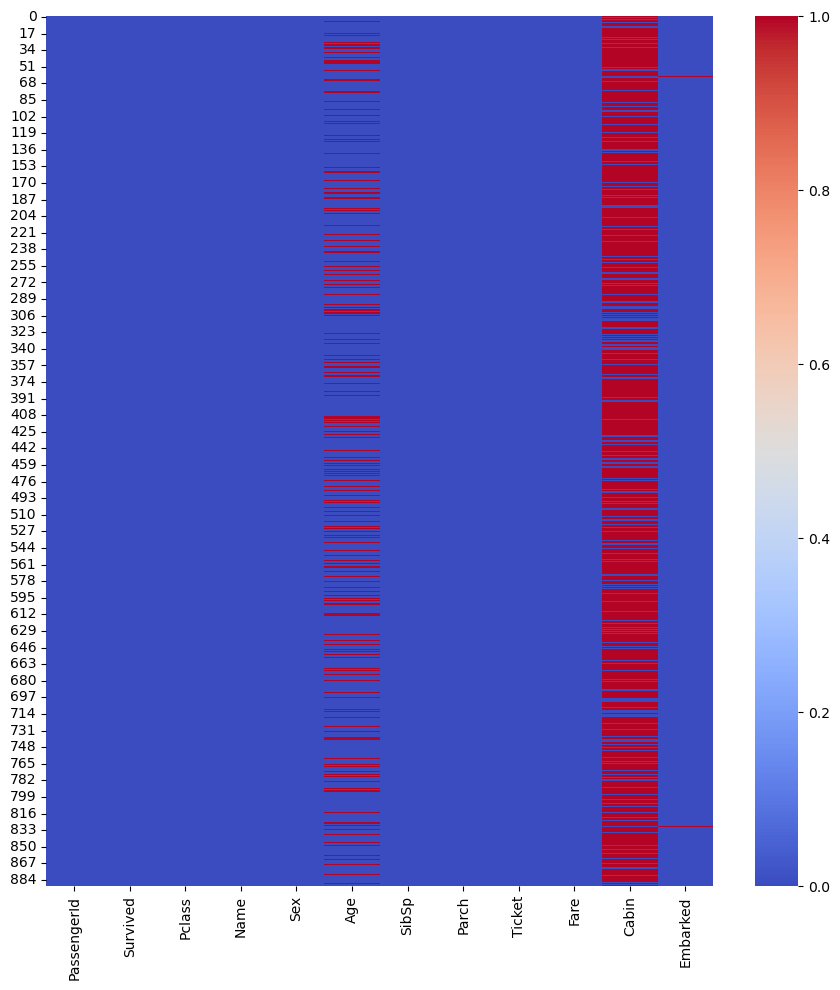

In [415]:
plt.figure(figsize=(9,10), facecolor='white')
sns.heatmap(df.isnull(),cmap='coolwarm')
plt.show()

In [416]:
value_miss=df.isnull().sum().sort_values(ascending=False)
value_miss

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [417]:
len(df)

891

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Percentage of Missing Value</span>

In [418]:
value_miss/len(df)*100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

<span style="color:Red;font-size: 12px;font-family: verdana;font-weight: bold ">Observation:19.86% of 'Age' data is null value,0.22% of 'Embarked' is null value, while 77.10% 'Cabin' data is null value.


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">STATISTICAL SUMMARY</span>

<span style="color:Green;font-size: 15px;font-family: verdana;font-weight: bold ">STATISTICAL SUMMARY: Integer or Float DataType</span>

In [419]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<span style="color:Green;font-size: 15px;font-family: verdana;font-weight: bold ">STATISTICAL SUMMARY: Object DataType</span>

In [420]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">NUMBER OF UNIQUE VALUE IN DATAFRAME</span>

In [421]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<span style="color:Red;font-size: 12px;font-family: verdana;font-weight: bold ">
    OBSERVATION:
"Survived" - Target / Label column has 2 categories / classes.

"sex" - Feature column has 2 categories / classes.

"Pclass" - Feature column has 2 categories / classes.

"Embarked" - Feature column has 3 categories / classes.

"SibSp" - Feature column has 7 discrete values.

"Parch" - Feature column has 7 discrete values.

Cabin is unnecessary feature with missing value so we can drop column Cabin.
</span>

In [422]:
df.drop(columns=['Cabin'], inplace=True)

In [423]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<span style="color:Red;font-size: 12px;font-family: verdana;font-weight: bold ">Note: One Column has been Reduced, Now Number of Column is 11 </span>

In [424]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [425]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [426]:
df.Survived.value_counts().plot.pie

<bound method PlotAccessor.pie of <pandas.plotting._core.PlotAccessor object at 0x00000267B633EE60>>

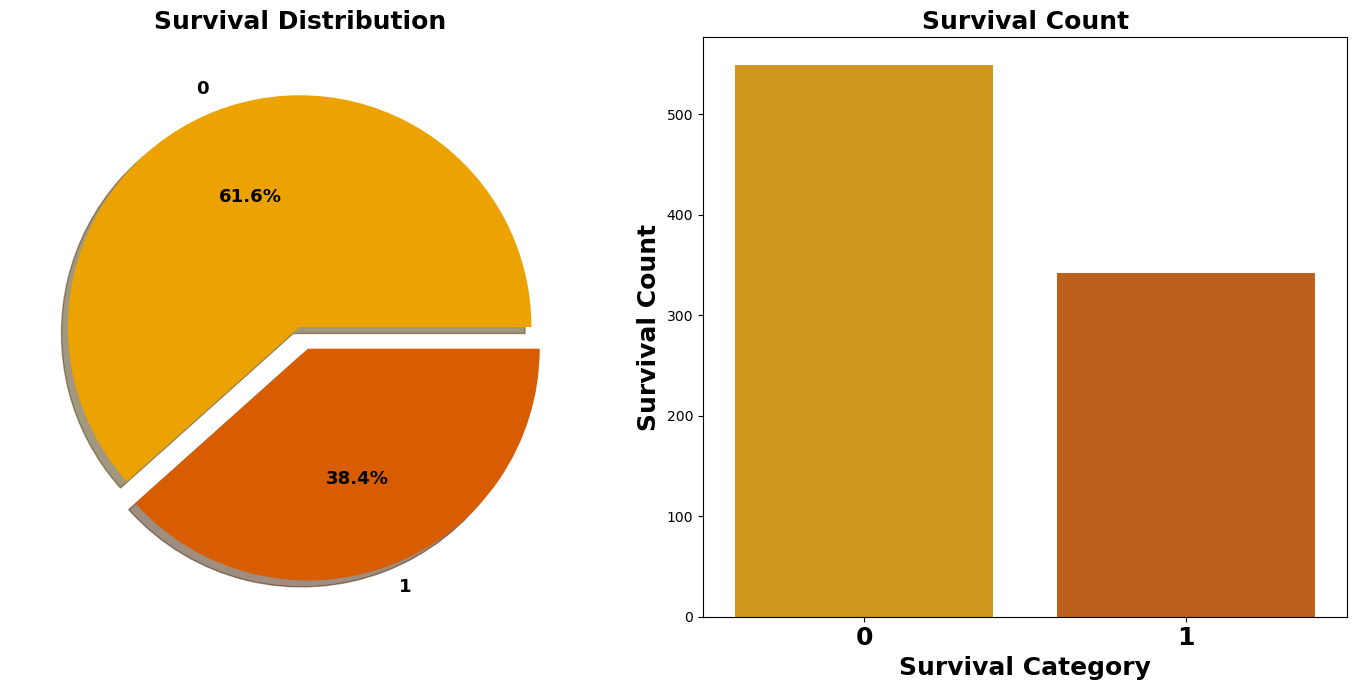

In [427]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot_r')
f,ax=plt.subplots(1,2,figsize=(14,7))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],textprops ={ 'fontsize':13,'fontweight' :'bold'},
                                       autopct='%2.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survival Distribution',fontsize=18,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot(x='Survived',data=df,ax=ax[1])
ax[1].set_title('Survival Count',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Survival Category",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Survival Count", fontsize= 18, fontweight='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

<span style="color:Red;font-size: 12px;font-family: verdana;font-weight: bold ">Observation: Most of the Passanger were not Survived </span>

In [428]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

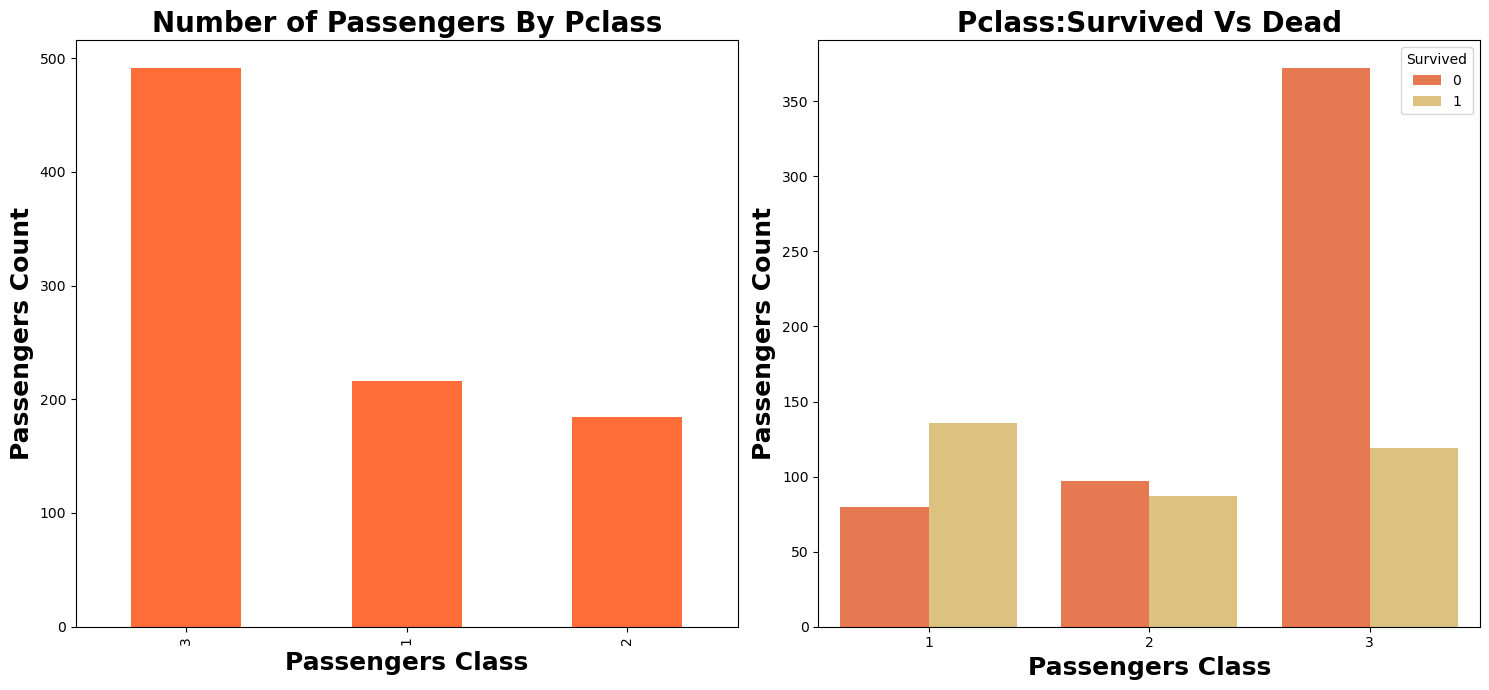

In [429]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', fontsize= 20, fontweight='bold')
ax[0].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[0].set_xlabel('Passengers Class', fontsize= 18, fontweight='bold')
sns.countplot(x='Pclass',hue='Survived', data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived Vs Dead', fontsize= 20, fontweight='bold')
ax[1].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[1].set_xlabel('Passengers Class', fontsize= 18, fontweight='bold')
plt.show()

In [430]:
pd.crosstab([df.Sex,df.Survived],df.Pclass, margins= True).style.background_gradient(cmap='summer_r')


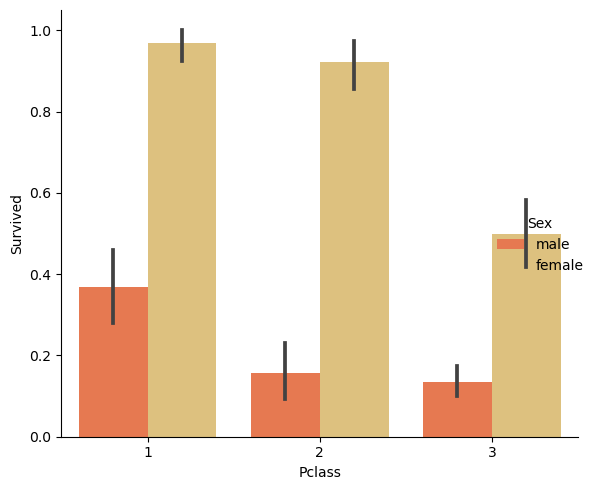

In [431]:
sns.catplot(x='Pclass',y='Survived', hue='Sex', data=df, kind='bar')
plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Age</span>

In [432]:
print("Oldest Passanger was of", df['Age'].max())

Oldest Passanger was of 80.0


In [433]:
print("yongest Passanger was of", df['Age'].min())

yongest Passanger was of 0.42


In [434]:
print("Averge age of Passanger was of", df['Age'].mean())

Averge age of Passanger was of 29.69911764705882


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Handling Missing Value of Age</span>

As we had seen eariler, the Age feature has 177 null values. to replace thses NaN values, we can assign them the mean age of the dataset.

We cannot simply Assign Mean Age for suppose of 29 year to 4 year old kid. So We must find another way to imputate mean age values.



*Looking Upon the name Name Feature, we can see that the names have as salutation like Mr or Mrs. Thus we can assign the mean values of Mr, Mrs etc. to the respective groups.*

In [435]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [436]:
df.values

array([[1, 0, 3, ..., 'A/5 21171', 7.25, 'S'],
       [2, 1, 1, ..., 'PC 17599', 71.2833, 'C'],
       [3, 1, 3, ..., 'STON/O2. 3101282', 7.925, 'S'],
       ...,
       [889, 0, 3, ..., 'W./C. 6607', 23.45, 'S'],
       [890, 1, 1, ..., '111369', 30.0, 'C'],
       [891, 0, 3, ..., '370376', 7.75, 'Q']], dtype=object)

In [437]:
df["Initial"]=0
for i in df:
    df['Initial']=df.Name.str.extract("([A-Z,a-z]+)\.") # Extracting Salutation or Initital from Name
    

In [438]:
df['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [439]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [440]:
df["Initial"].replace(['Capt', 'Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir'],
['Mr','Mr','other','Mr','Mr','other','Mrs','Mr','Miss','Miss','Mrs','Mr','Mr'],inplace=True)

In [441]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.818792
Mr        33.010791
Mrs       35.936364
other     35.500000
Name: Age, dtype: float64

In [442]:
df.loc[(df.Age.isnull() & (df.Initial)=='Mr'), 'Age'].fillna(32.73,inplace = True)


In [443]:
df.loc[(df.Age.isnull() & (df.Initial=='Mr')),'Age'].fillna(33.01, inplace=True)
df.loc[(df.Age.isnull() & (df.Initial=='Mrs')),'Age'].fillna(35.93, inplace=True)
df.loc[(df.Age.isnull() & (df.Initial=='Miss')),'Age'].fillna(21.81, inplace=True)
df.loc[(df.Age.isnull() & (df.Initial=='Master')),'Age'].fillna(4.57, inplace=True)
df.loc[(df.Age.isnull() & (df.Initial=='other')),'Age'].fillna(35.50, inplace=True)


In [444]:
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

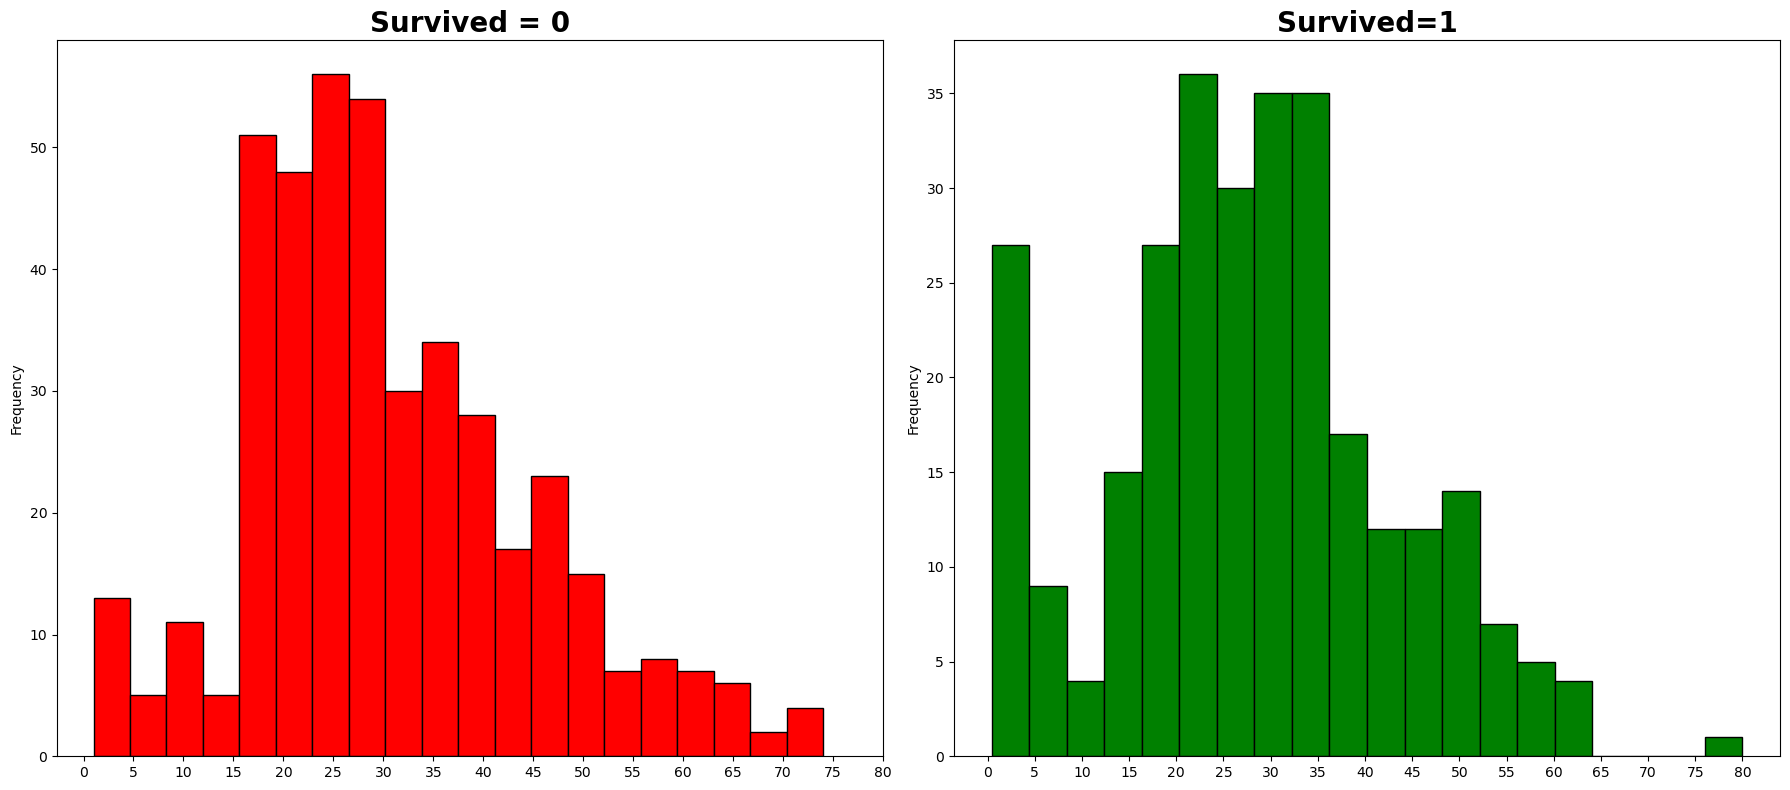

In [445]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0',fontsize= 20, fontweight='bold')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Survived=1',fontsize= 20, fontweight='bold')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [446]:
if not df['Age'].isnull().any():
    print("The 'Age' column is totally filled.")
else:
    print("There are still missing values in the 'Age' column.")


There are still missing values in the 'Age' column.


In [447]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [448]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')



In [449]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


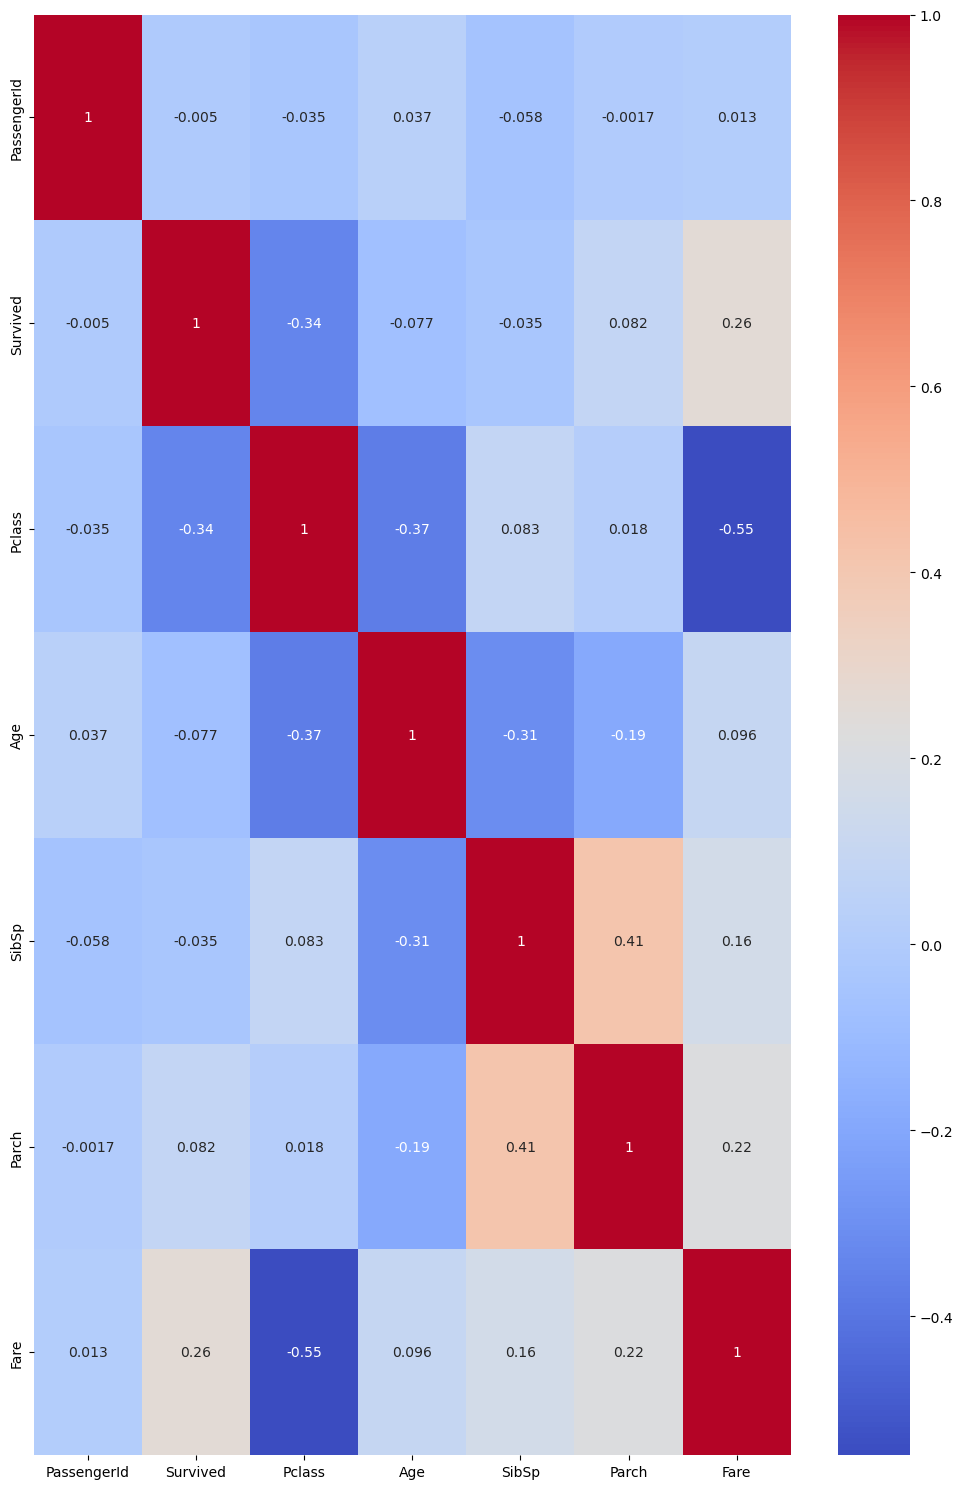

In [450]:
plt.figure(figsize=(10,15), facecolor='white')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

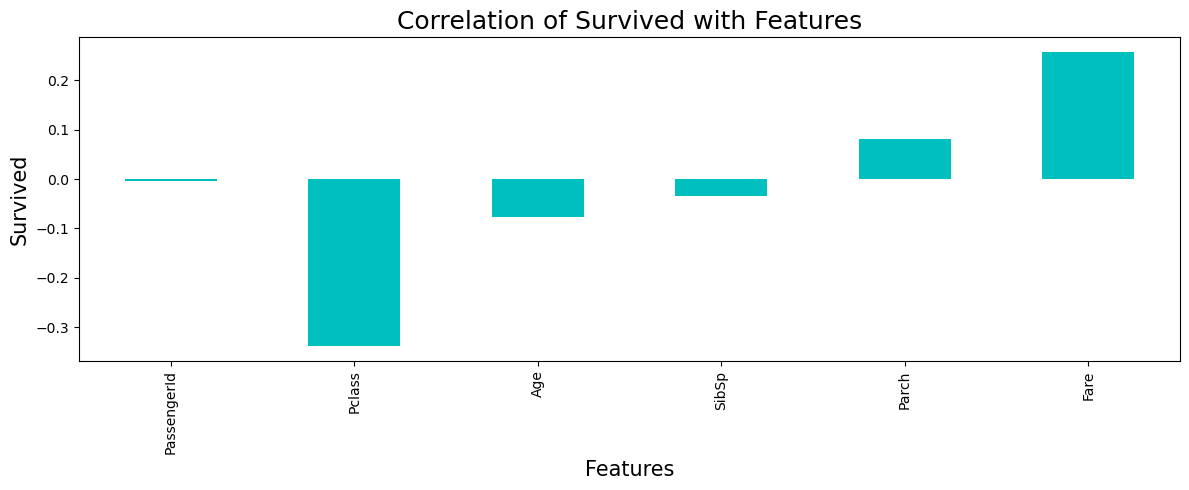

In [451]:
plt.figure(figsize = (12,5))
df.corr()['Survived'].drop(['Survived']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('Correlation of Survived with Features',fontsize = 18)
plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">OUTLIERS DETECTION AND REMOVAL</SPAN>

In [452]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Embarked', 'Initial']}

In [453]:
df.drop(["PassengerId",'Name','Ticket'], axis=1, inplace=True)

In [454]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Mr
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [455]:
df.shape


(891, 9)

In [456]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Sex', 'Embarked', 'Initial']}

In [457]:
numerical_feature=['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare']
categorical_feature=['Sex', 'Embarked', 'Initial']

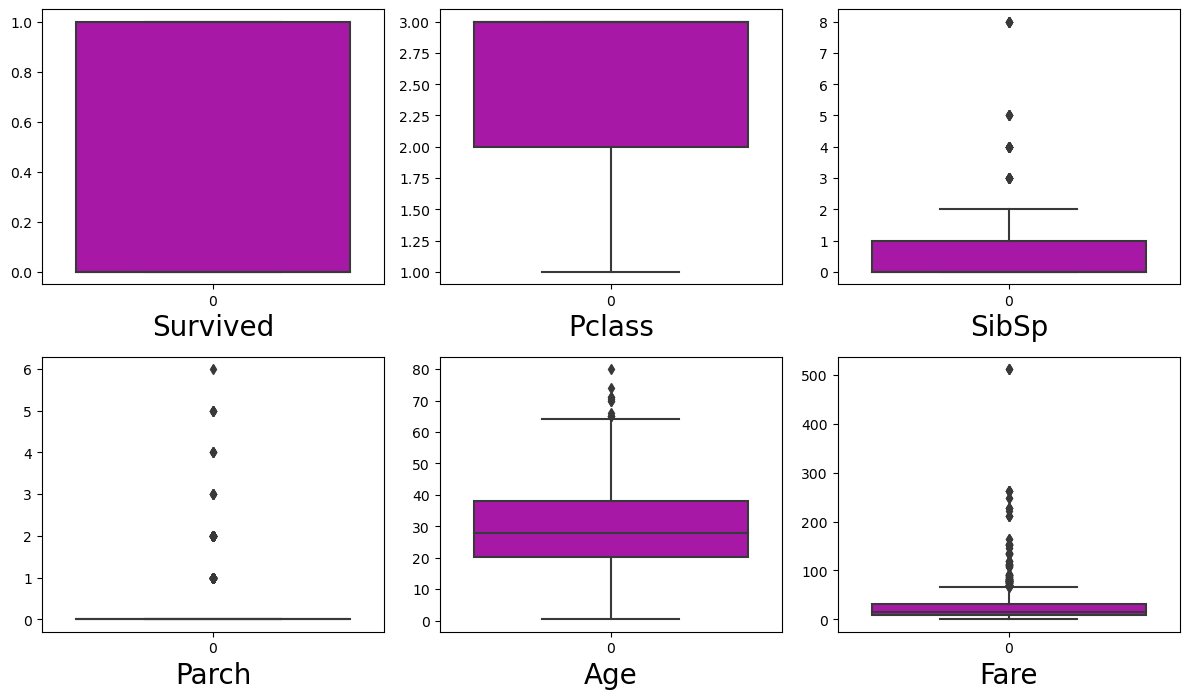

In [458]:

# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(12,10),facecolor='white')
plotnumber=1
for i in numerical_feature:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i],color='m')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">ENCODING CATEGORICAL FEATURES</SPAN>

In [459]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_feature:
    df[i]=le.fit_transform(df[i])
df.head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,2


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">STANDARD SCALER</SPAN>

In [460]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,2
887,1,1,0,19.0,0,0,30.0000,2,1
888,0,3,0,NaN,1,2,23.4500,2,1
889,1,1,1,26.0,0,0,30.0000,0,2


In [461]:
x=df
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,2
887,1,1,0,19.0,0,0,30.0000,2,1
888,0,3,0,NaN,1,2,23.4500,2,1
889,1,1,1,26.0,0,0,30.0000,0,2


In [462]:
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)
x_scale

array([[-0.78927234,  0.82737724,  0.73769513, ..., -0.50244517,
         0.58111394,  0.20934331],
       [ 1.2669898 , -1.56610693, -1.35557354, ...,  0.78684529,
        -1.93846038,  1.60132013],
       [ 1.2669898 ,  0.82737724, -1.35557354, ..., -0.48885426,
         0.58111394, -1.1826335 ],
       ...,
       [-0.78927234,  0.82737724, -1.35557354, ..., -0.17626324,
         0.58111394, -1.1826335 ],
       [ 1.2669898 , -1.56610693,  0.73769513, ..., -0.04438104,
        -1.93846038,  0.20934331],
       [-0.78927234,  0.82737724,  0.73769513, ..., -0.49237783,
        -0.67867322,  0.20934331]])

In [463]:
df2=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')


In [464]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [465]:
y=df2['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [466]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [467]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=43)
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)
#lr=LogisticRegression()
#lr.fit(x_train,y_train)
#pred=lr.predict(x_test)
#accuracy_report(pred,y_test)

(623, 9)
(268, 9)
(623,)
(268,)


In [468]:
x.isnull().value_counts()

Survived  Pclass  Sex    Age    SibSp  Parch  Fare   Embarked  Initial
False     False   False  False  False  False  False  False     False      714
                         True   False  False  False  False     False      177
dtype: int64

In [469]:
x['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [470]:
#df['column_name'].fillna(df['column_name'].mean(), inplace=True)
x['Age'].fillna(x['Age'].mean(),inplace=True)

In [471]:
x['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

In [472]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=43)

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
accuracy_score(pred,y_test)

1.0

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">FINDING BEST RANDOM STATE</SPAN>

In [473]:
max_acc = 0
max_rs = 0

for i in range(50, 300):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test, pred)
    
    if acc > max_acc:  
        max_acc = acc
        max_rs = i

print("Max Accuracy Score:", max_acc, "at Random State:", max_rs)


Max Accuracy Score: 1.0 at Random State: 50


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LINEAR REGRESSION</SPAN>

In [474]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=76)

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print("Accuracy Score ", accuracy_score(pred,y_test))
print("Confusion Matrix ", confusion_matrix(pred,y_test))
print("Classfication Reports ", classification_report(pred,y_test))



Accuracy Score  1.0
Confusion Matrix  [[165   0]
 [  0 103]]
Classfication Reports                precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       103

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">DECESSION TREE CLASSIFIER</SPAN>

In [475]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)

print("Accuracy Score ", accuracy_score(pred,y_test))
print("Confusion Matrix ", confusion_matrix(pred,y_test))
print("Classfication Reports ", classification_report(pred,y_test))

Accuracy Score  1.0
Confusion Matrix  [[165   0]
 [  0 103]]
Classfication Reports                precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       103

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">K Neighbors Classifier</SPAN>

In [476]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

print("Accuracy Score ", accuracy_score(pred,y_test))
print("Confusion Matrix ", confusion_matrix(pred,y_test))
print("Classfication Reports ", classification_report(pred,y_test))

Accuracy Score  0.7388059701492538
Confusion Matrix  [[146  51]
 [ 19  52]]
Classfication Reports                precision    recall  f1-score   support

           0       0.88      0.74      0.81       197
           1       0.50      0.73      0.60        71

    accuracy                           0.74       268
   macro avg       0.69      0.74      0.70       268
weighted avg       0.78      0.74      0.75       268



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Random Forest Classifier</SPAN>

In [477]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)

print("Accuracy Score ", accuracy_score(pred,y_test))
print("Confusion Matrix ", confusion_matrix(pred,y_test))
print("Classfication Reports ", classification_report(pred,y_test))

Accuracy Score  1.0
Confusion Matrix  [[165   0]
 [  0 103]]
Classfication Reports                precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       103

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Ada Boost Classifier</SPAN>

In [478]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred=abc.predict(x_test)

print("Accuracy Score ", accuracy_score(pred,y_test))
print("Confusion Matrix ", confusion_matrix(pred,y_test))
print("Classfication Reports ", classification_report(pred,y_test))

Accuracy Score  1.0
Confusion Matrix  [[165   0]
 [  0 103]]
Classfication Reports                precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       103

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Gradient Boosting Classifier</SPAN>

In [479]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)

print("Accuracy Score ", accuracy_score(pred,y_test))
print("Confusion Matrix ", confusion_matrix(pred,y_test))
print("Classfication Reports ", classification_report(pred,y_test))

Accuracy Score  1.0
Confusion Matrix  [[165   0]
 [  0 103]]
Classfication Reports                precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       103

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH LOGISTIC REGRESSION</SPAN>

In [480]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x ,y, cv=5)
print("Cross Validation score is", cv_score)
print("Mean of Cross Validation score is", cv_score.mean())
print("Standard Deviation of Cross Validation score is", cv_score.std())



Cross Validation score is [1. 1. 1. 1. 1.]
Mean of Cross Validation score is 1.0
Standard Deviation of Cross Validation score is 0.0


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH DTC</SPAN>

In [481]:
from sklearn.model_selection import cross_val_score
cv_score1=cross_val_score(dtc,x ,y, cv=5)
print("Cross Validation score is", cv_score1)
print("Mean of Cross Validation score is", cv_score1.mean())
print("Standard Deviation of Cross Validation score is", cv_score1.std())

Cross Validation score is [1. 1. 1. 1. 1.]
Mean of Cross Validation score is 1.0
Standard Deviation of Cross Validation score is 0.0


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH KNEIGHBOUR CLASSIFIER</SPAN>

In [482]:
cv_score2=cross_val_score(knn,x ,y, cv=5)
print("Cross Validation score is", cv_score2)
print("Mean of Cross Validation score is", cv_score2.mean())
print("Standard Deviation of Cross Validation score is", cv_score2.std())

Cross Validation score is [0.69273743 0.70224719 0.74157303 0.79775281 0.78651685]
Mean of Cross Validation score is 0.7441654635616095
Standard Deviation of Cross Validation score is 0.042600349156347146


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH RANDOM FOREST CLASSIFIER</SPAN>

In [483]:
cv_score3=cross_val_score(rfc,x ,y, cv=5)
print("Cross Validation score is", cv_score3)
print("Mean of Cross Validation score is", cv_score3.mean())
print("Standard Deviation of Cross Validation score is", cv_score3.std())

Cross Validation score is [1. 1. 1. 1. 1.]
Mean of Cross Validation score is 1.0
Standard Deviation of Cross Validation score is 0.0


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH ADABOOST CLASSIFIER</SPAN>

In [484]:
cv_score4=cross_val_score(abc,x ,y, cv=5)
print("Cross Validation score is", cv_score4)
print("Mean of Cross Validation score is", cv_score4.mean())
print("Standard Deviation of Cross Validation score is", cv_score4.std())

Cross Validation score is [1. 1. 1. 1. 1.]
Mean of Cross Validation score is 1.0
Standard Deviation of Cross Validation score is 0.0


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH GRADIENT BOOST CLASSIFIER</SPAN>

In [485]:
cv_score5=cross_val_score(gbc,x ,y, cv=5)
print("Cross Validation score is", cv_score5)
print("Mean of Cross Validation score is", cv_score5.mean())
print("Standard Deviation of Cross Validation score is", cv_score5.std())

Cross Validation score is [1. 1. 1. 1. 1.]
Mean of Cross Validation score is 1.0
Standard Deviation of Cross Validation score is 0.0


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">HYPER PARAMETER TUNING</SPAN>

<span style="color:Blue;font-size: 14px;font-family: verdana;font-weight: bold ">GRID SEARCH CV</SPAN>

In [486]:
from sklearn.model_selection import GridSearchCV


In [487]:
# Create Logistic Regression model
lr = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],          # Regularization strength
    'penalty': ['l1', 'l2'],                     # Regularization type
    'solver': ['liblinear', 'lbfgs', 'saga'],   # Solver algorithm
    'max_iter': [100, 200, 300],                  # Maximum iterations
}

# Create GridSearchCV instance
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [488]:
gcv=GridSearchCV(lr,param_grid,cv=5, scoring='accuracy')
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='accuracy')

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">FINAL MODEL</SPAN>

In [489]:
final_model=LogisticRegression(C=1, max_iter= 100, penalty= 'l2', solver='liblinear',random_state=76)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

print("Accuracy Score ", accuracy_score(pred,y_test))
print("Confusion Matrix ", confusion_matrix(pred,y_test))
print("Classfication Reports ", classification_report(pred,y_test))

Accuracy Score  1.0
Confusion Matrix  [[165   0]
 [  0 103]]
Classfication Reports                precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       103

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



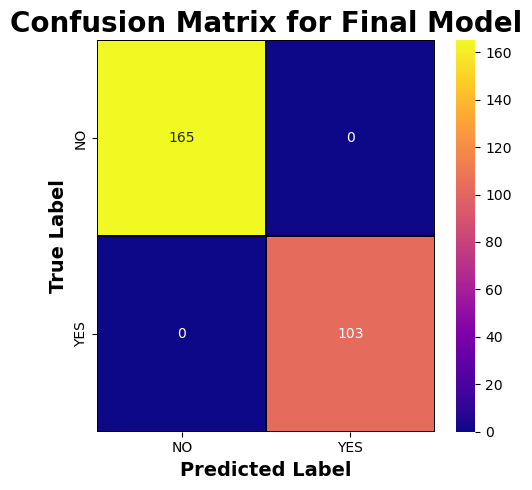

In [490]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(y_test, pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

In [491]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_model,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(y_test, final_model.predict(x_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">SAVING-FINAL MODEL</SPAN>

In [492]:
import joblib
joblib.dump(final_model,'Titanic_Survival_Project.pkl')

['Titanic_Survival_Project.pkl']

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">PREDICTION</SPAN>

In [493]:
prediction = final_model.predict(x_test)


In [494]:
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
